---
title: "Running pretrained ML models on a Laptop"
description: "This notebook demonstrates how to use the Python libraries called `transformers` and `diffusers` by HuggingFace on a Macbook using the onboard GPU."
author: "Colin Kinz-Thompson"
date: "12/11/2023"
format:
  html:
    toc: true
    code-fold: true
---

## Set Things Up

In [1]:
#### If you don't already have the libraries that will be imported in this notebook, you can uncomment the line below to install them
# %pip install torch numpy matplotlib transformers diffusers accelerate


In [2]:
## A lot of models on hugging face are in PyTorch
import torch

### This bit of code determines whether you have an NVIDIA gpu or you want to use the mac silicon GPU.
if torch.cuda.is_available():
	device = "cuda:0"
elif torch.backends.mps.is_available():
	device = torch.device("mps")
else:
	device = "cpu"

## Other imports
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Text Completion
These are the blenderbot models developed by facebook. The following code shows directly using the model and tokenizer objects.

## Blenderbot (small)#

In [3]:
from transformers import AutoTokenizer, BlenderbotSmallForConditionalGeneration

modelname = "facebook/blenderbot_small-90M"
tokenizer = AutoTokenizer.from_pretrained(modelname)
model = BlenderbotSmallForConditionalGeneration.from_pretrained(modelname).to(device)

In [4]:
prompt = "My dog is cute. Why don't you agree?"

inputs = tokenizer(prompt, return_tensors="pt").to(device)
reply_ids = model.generate(**inputs)
output = tokenizer.batch_decode(reply_ids, skip_special_tokens=True)[0]

print(prompt)
print("> ",output)

My dog is cute. Why don't you agree?
>  i don't know, i guess it's just that i've never had a dog before.


## Blenderbot (regular)

In [5]:
from transformers import BlenderbotTokenizer, BlenderbotForConditionalGeneration
	
modelname = "facebook/blenderbot-400M-distill"
# modelname = "facebook/blenderbot-1B-distill"
# modelname = "facebook/blenderbot-3B" ## a little too large for my laptop

tokenizer = BlenderbotTokenizer.from_pretrained(modelname)
model = BlenderbotForConditionalGeneration.from_pretrained(modelname).to(device)

In [6]:
prompt = "My dog is cute. Why don't you agree?"

inputs = tokenizer([prompt], return_tensors="pt").to(device)
reply_ids = model.generate(**inputs)
output = tokenizer.batch_decode(reply_ids,skip_special_tokens=True)[0]

print(prompt)
print(">",output)

My dog is cute. Why don't you agree?
>  I love dogs, but I'm allergic to them. What kind of dog do you have?


# Images
The following uses the stable diffusion quick rendering model. The code demonstrates the use of a pipeline aproach

In [7]:
## Clear the previous models out of the GPU
model = None
tokenizer = None
output = None
reply_ids = None
pipe = None

In [8]:
from diffusers import AutoPipelineForText2Image

# modelname = 'stabilityai/sd-turbo'
modelname = 'stabilityai/sdxl-turbo'

pipe = AutoPipelineForText2Image.from_pretrained(modelname, torch_dtype=torch.float16, variant="fp16")
pipe = pipe.to(device)

Loading pipeline components...: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 15.75it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:08<00:00,  4.25s/it]


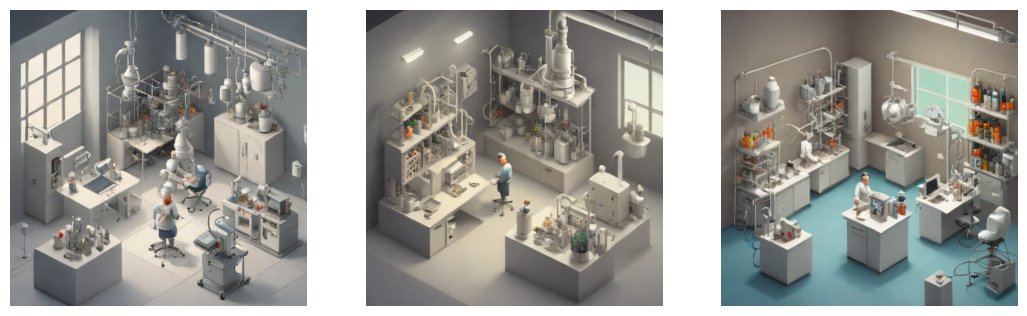

In [9]:
prompt = "isometric science laboratory, chemistry, biology, NMR, sci-fi, 3d art, muted colors, soft lighting, ray tracing"
negprompt = 'doctor, medicine, dentist, office'

imgs = []
for _ in range(3):
	image = pipe(prompt=prompt, negative_prompt=negprompt, num_inference_steps=2, strength=0.9, guidance_scale=0.0).images[0]
	imgs.append(image)
	
fig,ax=plt.subplots(1,len(imgs),figsize=(13,4))
[ax[i].imshow(imgs[i]) for i in range(len(imgs))]
[aa.axis('off') for aa in ax]
plt.show()